# Experiment 4: Non Linear Regression

In [1]:
import pickle

import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../../data/energy/df.csv", )
df.head()

,dom_id,pmt_id,pos_x,pos_y,pos_z,dir_x,dir_y,dir_z,tot,time,energy,label,group
0,1054,32658,-16.064,-76.599,112.441,0.000,0.955,-0.296,35,28449.0,13.415,1,1
1,1054,32671,-16.208,-76.707,112.611,-0.719,0.415,0.558,24,28450.0,13.415,1,1
2,1053,32639,-16.064,-76.624,122.011,0.000,0.830,0.558,12,28450.0,13.415,1,1
3,1054,32670,-16.064,-76.624,112.611,0.000,0.830,0.558,54,28450.0,13.415,1,1
4,1054,32664,-15.968,-76.625,112.559,0.478,0.827,0.296,47,28451.0,13.415,1,1


In [3]:
df.describe()

,dom_id,pmt_id,pos_x,pos_y,pos_z,dir_x,dir_y,dir_z,tot,time,energy,label,group
count,489906.000000,489906.000000,489906.000000,489906.000000,489906.000000,489906.000000,489906.000000,489906.000000,489906.000000,4.899060e+05,489906.000000,489906.0,489906.000000
mean,1048.735653,32496.026419,0.341670,-1.514543,119.205209,0.000912,-0.002101,-0.182805,26.056821,4.893892e+07,37.133466,1.0,3262.098839
std,592.666757,18372.661240,50.964521,62.401296,47.553276,0.582604,0.583274,0.535609,9.273521,2.905600e+07,24.312587,0.0,1937.060856
min,1.000000,1.000000,-94.627000,-115.600000,37.700000,-0.955000,-0.955000,-1.000000,1.000000,2.844900e+04,10.002000,1.0,1.000000
25%,537.000000,16622.000000,-44.772000,-58.113000,74.211000,-0.478000,-0.478000,-0.556000,23.000000,2.393785e+07,16.872000,1.0,1595.000000
50%,1056.000000,32727.000000,1.424000,-4.581000,121.789000,0.000000,-0.000000,-0.296000,26.000000,4.810140e+07,29.505000,1.0,3206.000000
75%,1562.000000,48398.750000,40.478000,48.480000,160.241000,0.478000,0.478000,0.296000,28.000000,7.434630e+07,52.643000,1.0,4956.000000
max,2070.000000,64170.000000,96.243000,105.024000,196.611000,0.955000,0.955000,0.558000,209.000000,9.998601e+07,99.947000,1.0,6665.000000


# Define target and predictors

In [11]:
target_column = ['energy'] 
predictors = list(set(list(df.columns))-set(target_column))
df[predictors] = df[predictors]/df[predictors].max()
df.describe()

,dom_id,pmt_id,pos_x,pos_y,pos_z,dir_x,dir_y,dir_z,tot,time,energy,label,group
count,489906.000000,489906.000000,489906.000000,489906.000000,489906.000000,489906.000000,489906.000000,489906.000000,489906.000000,489906.000000,489906.000000,489906.0,489906.000000
mean,0.506636,0.506405,0.003550,-0.014421,0.606300,0.000955,-0.002200,-0.327607,0.124674,0.489458,37.133466,1.0,0.489437
std,0.286312,0.286312,0.529540,0.594162,0.241865,0.610056,0.610758,0.959873,0.044371,0.290601,24.312587,0.0,0.290632
min,0.000483,0.000016,-0.983209,-1.100701,0.191749,-1.000000,-1.000000,-1.792115,0.004785,0.000285,10.002000,1.0,0.000150
25%,0.259420,0.259031,-0.465197,-0.553331,0.377451,-0.500524,-0.500524,-0.996416,0.110048,0.239412,16.872000,1.0,0.239310
50%,0.510145,0.510005,0.014796,-0.043619,0.619441,0.000000,-0.000000,-0.530466,0.124402,0.481081,29.505000,1.0,0.481020
75%,0.754589,0.754227,0.420581,0.461609,0.815015,0.500524,0.500524,0.530466,0.133971,0.743567,52.643000,1.0,0.743586
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,99.947000,1.0,1.000000


# Split Dataset 

Dataset needs to be split into:
1. Main
    1. Train
    2. Test
2. Holdout for Testing on Unseen Data

Steps:
1. Identify Length of Dataset: `489906`
2. `90/10` Split for Main/Holdout Data
3. Save Last 10% as Holdout Data
    1. for `X`
    2. for `y`
4. Save first 90% as Main Data
    1. for `X`
    2. for `y`
5. `80/20` Train/Test Split on Main Data

In [12]:
X = df[predictors].values
y = df[target_column].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)
print(X_train.shape); print(X_test.shape)

(342934, 12)
(146972, 12)


# Decision Tree

In [33]:
dtree = DecisionTreeRegressor(max_depth=100,
                              min_samples_leaf=1,
                              random_state=3)

dtree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=100, random_state=3)

In [34]:
pred_train_tree = dtree.predict(X_train)
print("RMSE: ", np.sqrt(mean_squared_error(y_train,pred_train_tree)))
print("R2: ", r2_score(y_train, pred_train_tree))

pred_test_tree = dtree.predict(X_test)
print("RMSE: ", np.sqrt(mean_squared_error(y_test,pred_test_tree))) 
print("R2: ", r2_score(y_test, pred_test_tree))

RMSE:  1.7550140375170123e-13
R2:  1.0
RMSE:  6.145465428027621
R2:  0.9361644917732885


In [35]:
pred_test_tree

array([55.756, 17.144, 52.876, ..., 34.485, 52.876, 15.034])

# Random Forest (Bootstrap Aggregation)

In [39]:
model_rf = RandomForestRegressor(n_estimators=500,
                                 oob_score=True,
                                 random_state=100)

model_rf.fit(X_train, y_train) 

pred_train_rf = model_rf.predict(X_train)

print("RMSE: ", np.sqrt(mean_squared_error(y_train,pred_train_rf)))
print("R2: ", r2_score(y_train, pred_train_rf))

pred_test_rf = model_rf.predict(X_test)
print("RMSE: ", np.sqrt(mean_squared_error(y_test,pred_test_rf)))
print("R2: ", r2_score(y_test, pred_test_rf))

/Users/shrutirao/Documents/Coding/Thesis/km3net/venv/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


RMSE:  1.5243044047639924
R2:  0.9960676911497601
RMSE:  4.148946461576316
R2:  0.9709043260006198


# Results

In [41]:
model_rf.score(X_test, y_test)

0.9709043260006198

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

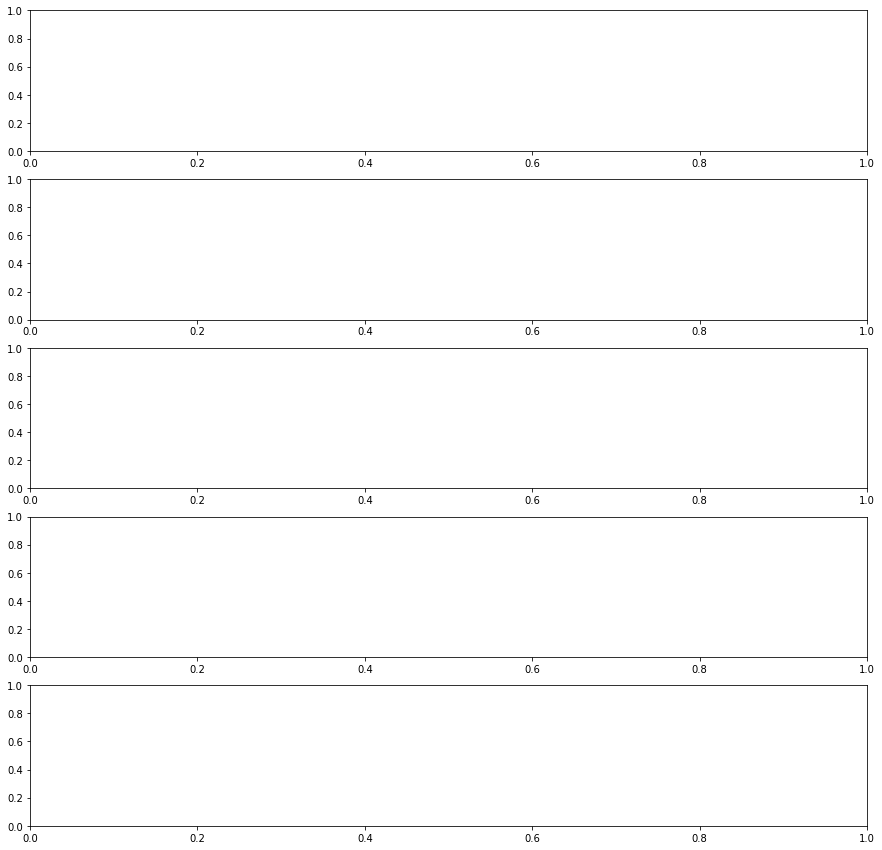

In [45]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, figsize=(15,15))

ax1.scatter(X_test['pos_x'], y_test,  color='black')
ax1.plot(X_test['pos_x'], pred_test_rf, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

ax2.scatter(X_test['pos_y'], y_test,  color='black')
ax2.plot(X_test['pos_y'], pred_test_rf, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

ax3.scatter(X_test['pos_z'], y_test,  color='black')
ax3.plot(X_test['pos_z'], pred_test_rf, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

ax4.scatter(X_test['time'], y_test,  color='black')
ax4.plot(X_test['time'], pred_test_rf, color='blue', linewidth=3)

ax5.scatter(X_test['tot'], y_test,  color='black')
ax5.plot(X_test['tot'], pred_test_rf, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

# Save Model

In [ ]:
filename = 'finalized_svr_rbf_model.sav'
pickle.dump(svr_rbf, open(filename, 'wb'))

# Unseen Data

In [ ]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

In [ ]:
Xnew = hold_X
ynew = loaded_model.predict(Xnew)

In [ ]:
ynew[:5]

In [ ]:
hold_y[:5]

In [ ]:
# print('Coefficients: \n {}'.format(loaded_model.coefs_))

print('Mean squared error: %.2f'
      % np.sqrt(mean_squared_error(hold_y, ynew)))

print('Coefficient of determination: %.2f'
      % r2_score(hold_y, ynew))

# Results

# Tests

1. SVR RBF
```
    Mean squared error: 0.50
Coefficient of determination: -0.05
```


# Final Model Parameters:
1. hidden layers = 200
2. Optimiser = Adam
3. Loss = Logistic
4. Learning Rate = 0.001